#### Import Libraries

In [181]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in CSV / Create Dataframe

In [182]:
df = pd.read_csv('Mall_Customers.csv')

#### Check Details of the CSV /Explore the Data:

From the below we see that the data looks fairly clean and there is no missing data.

In [183]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [185]:
df.shape

(200, 5)

In [186]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check the number of NaNs/Nulls in the Dataframe

In [187]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [188]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Feature Selection for Model:

Lets explore the relationship between two features, the Annual Income and Spending Scores of the Mall Customers.

We will first create a sub-Dataframe. We want this to have all rows and just the Annual Income and Spending Scores columns i.e. columns with index 3 and 4. And we want to look at the values of these columns.

In [189]:
X = df.iloc[:,[3,4]].values

#### Build the Model

We will be using the KMeans algorithm for building the model.
We will use the elbow method to decide on what K will be.

In [190]:
from sklearn.cluster import KMeans

In [191]:
kmeans = KMeans(n_clusters=4)

#### Fit the Model

In [192]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Lets have a look at the data of the model.

We'll look at the position of the 4 cluster centers and which of the 4 cluster groups each of the data points have been put into.

In [193]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895],
       [48.26      , 56.48      ]])

In [194]:
kmeans.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

#### Choosing a K Value using the Elbow Method

Let's go ahead and use the elbow method to pick a good K Value.

The K-means algorithm aims to choose centroids that minimise the **inertia** so we will search for a reasonable K Value with the lowest inertia.

In the below graph we see that the last big elbow in the error rates is at K = 5. The error rate continues to decrease as we continue to increase k but not by a meaningful enough amount to justify using a greater K Value. So we will use K=5.

In [195]:
error_rate = []

In [196]:
for i in range(1,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    error_rate.append(kmeans.inertia_)

Text(0, 0.5, 'Error Rate')

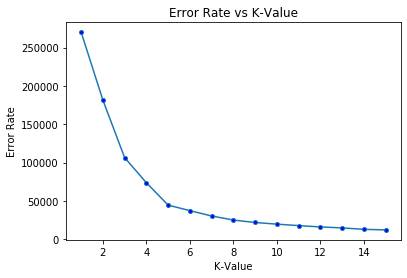

In [197]:
plt.plot(range(1,16), error_rate, marker='o', markerfacecolor='blue', markersize=4)
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

#### Final Model Build with chosen K Value

In [198]:
kmeans = KMeans(n_clusters=5,init='k-means++')
predictions = kmeans.fit_predict(X)

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

#### Visualizing the Clusters

In [199]:
predictions

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

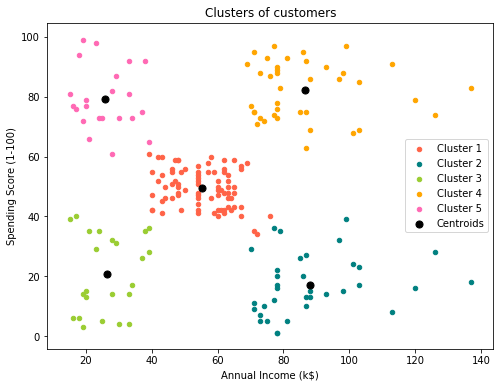

In [220]:
plt.figure(figsize=(8,6))
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s = 20, c = 'tomato', label = 'Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s = 20, c = 'teal', label = 'Cluster 2')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s = 20, c = 'yellowgreen', label = 'Cluster 3')
plt.scatter(X[predictions == 3, 0], X[predictions == 3, 1], s = 20, c = 'orange', label = 'Cluster 4')
plt.scatter(X[predictions == 4, 0], X[predictions == 4, 1], s = 20, c = 'hotpink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Model Interpretation 
- Cluster 1 (Red Color) -> average in terms of earning and spending [TARGET SET]
- Cluster 2 (Blue Color) -> earning high but spending less [TARGET SET]
- Cluster 3 (Green Color) -> earning less , spending less
- Cluster 4 (Orange Color) -> earning high and also spending high
- Cluster 5 (Pink Color) -> earning less but spending more 


If we were targeting groups here to try and entice them to spend more the two key groups to go for would be the red group who are spending average and earning average as well as the blue group who are high earners but currently have a low spending score.

We can put Cluster 1 and 2 into some alerting system where promotional emails can be sent to them on a daily basis as these are likely easier to convert into increased spenders.
Where as for other groups we can send a once a week or once a month promotional email.